<!--NOTEBOOK_HEADER-->
*This notebook contains material from [cbe30338-2021](https://jckantor.github.io/cbe30338-2021);
content is available [on Github](https://github.com/jckantor/cbe30338-2021.git).*


<!--NAVIGATION-->
< [3.0 Feedback Control](https://jckantor.github.io/cbe30338-2021/03.00-Feedback-Control.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [3.2 Setpoints](https://jckantor.github.io/cbe30338-2021/03.02-Setpoints.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe30338-2021/blob/master/docs/03.01-Case-Study-Thermal-Cycling-PCR.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe30338-2021/03.01-Case-Study-Thermal-Cycling-PCR.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 3.1 Case Study: Thermal Cycling for PCR

The purpose of this notebook is to describe a technological challenge requiring the use of the feedback control for a satisfactory result. Here we consider performance requirements for a thermal cycling device used for diagnostic testing based on the polymerase chain reaction (PCR). These devices are used to exponentially "amplify" segments of DNA that may be present in biological samples. These devices are ubiquitous in modern biology laboraties and medical testing services.

In this notebook we will review:

* Polymerase chain reaction (PCR) 
* Several PCR thermal cyclers used in diagnostic laboratories
* Performance requirements for temperature control in a PCR thermal cycler
* Use of Temperature Control Laboratory to prototype a PCR control system

The learning goals are for student to able to:

* Describe use the of feedback control as an enabling technology for laboratory and process systems.
* Develop control performance requirements for an application.

## 3.1.1 Pre-reads

* [Notre Dame Center for Advanced Diagnostics and Therapeutics](https://advanceddiagnostics.nd.edu/assets/382241/coronavirus_test_faq.pdf)
* [miniPCR Thermal Cycler]( https://www.youtube.com/watch?time_continue=1&v=ALNZJhUOSMs&feature=emb_logo)

## 3.1.2 Coronavirus Diagnostics

COVID-19 is a respiratory tract infection by a specific species of coronavirus called SARS-CoV-2. Coronaviruses have a protein envelope characterized by club-shaped protrusions that give the impression of a corona when viewed with an electron microscope.

<p href="https://commons.wikimedia.org/wiki/File:Novel_Coronavirus_SARS-CoV-2.jpg#/media/File:Novel_Coronavirus_SARS-CoV-2.jpg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/Novel_Coronavirus_SARS-CoV-2.jpg/800px-Novel_Coronavirus_SARS-CoV-2.jpg" alt="Electron micrograph of SARS-CoV-2 virions with visible coronae"></a><br>By NIAID - <a rel="nofollow" class="external free" href="https://www.flickr.com/photos/niaid/49534865371/">https://www.flickr.com/photos/niaid/49534865371/</a>, <a href="https://creativecommons.org/licenses/by/2.0" title="Creative Commons Attribution 2.0">CC BY 2.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=87484997">Link</p>

Coronaviruses have a relatively large genome comprised of a single strand of positive-sense RNA.

<p href="https://commons.wikimedia.org/wiki/File:Vaccines-08-00587-g002-A.png"><img width="512" alt="Vaccines-08-00587-g002-A" src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Vaccines-08-00587-g002-A.png/512px-Vaccines-08-00587-g002-A.png"></p>

[https://commons.wikimedia.org/wiki/File:Vaccines-08-00587-g002-A.png](https://commons.wikimedia.org/wiki/File:Vaccines-08-00587-g002-A.png)

 A coronavirus test begins with a swab of throat or nose. The swab is rinsed with a buffer solution to capture the host DNA and RNA, and the RNA of any virus that may be present. RNA is isolated from the solution and converted to DNA using a reverse transcriptase enzyme. The amount of DNA collected in this fashion is too small to analyze by conventional methods. So the first step in a diagnostic protocol is to amplify the amount of DNA using the polymerase chain reaction.

## 3.1.3 Polymerase Chain Reaction (PCR)

The polymerase chain reaction (PCR) is a technique used in molecular biology to take amplify small samples of DNA into quantities large enough to be detected using conventional analytical methods. The technique is described in the following videos.

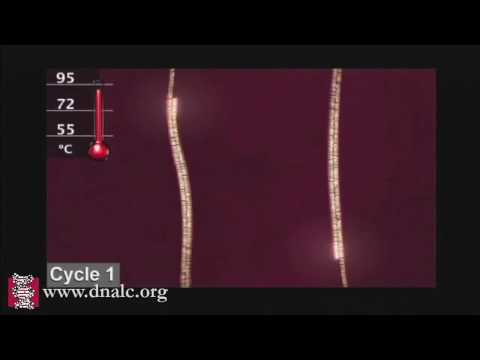

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('2KoLnIwoZKU')

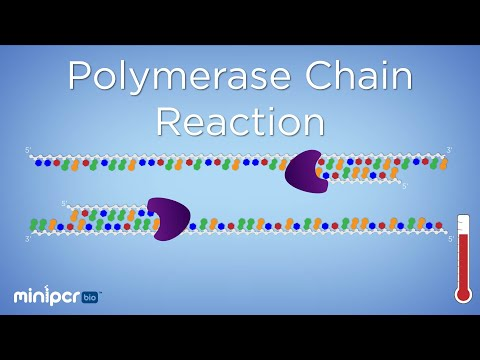

In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('c07_5BfIDTw')

PCR provides an exponential amplification of target DNA sequences to concentrations that can be detected by conventional analytical techniques.

<img width="800" alt="Polymerase chain reaction-en" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Polymerase_chain_reaction-en.svg/800px-Polymerase_chain_reaction-en.svg.png">

[https://commons.wikimedia.org/wiki/File:Polymerase_chain_reaction-en.svg](https://commons.wikimedia.org/wiki/File:Polymerase_chain_reaction-en.svg)

The main part of PCR consists of three steps that are repeated 20 or more times:

1. Denaturation at 94-96 $^\circ$C. At this step, DNA 'breaks apart', splitting from a double helix into single strands
2. Annealing at temperatures between 50 and 68 $^\circ$C. Primers bond to the single-stranded DNA.  The exact temperature depends on the length and content of the target sequence.
3. Extension at ca. 72 $^\circ$C. Polymerase compliments the DNA, synthesizing strands that are of the target sequence

## 3.1.4 Examples of low-cost and open-source PCR thermal cyclers

PCR thermal cyclers are a common piece of hardware in biology and medical testing laboratories. These devices automate the thermal cycle operation by providing users with convenient means of specifying parameters for a particular PCR test, and then executing that cycle to some specified degree of precision. Most commercial devices perform multiple from a few to several hundres tests at a time.

![](http://media.biocompare.com/m/37/Product/239450-400x300.jpg)

There are also examples of low-cost and open-source designs of PCR thermal cyclers intended for education, field work, and other situations where there is a benefit to keeping costs very low.

* [miniPCR Thermal Cycler]( https://www.youtube.com/watch?time_continue=1&v=ALNZJhUOSMs&feature=emb_logo)
* https://www.instructables.com/id/Arduino-PCR-thermal-cycler-for-under-85/


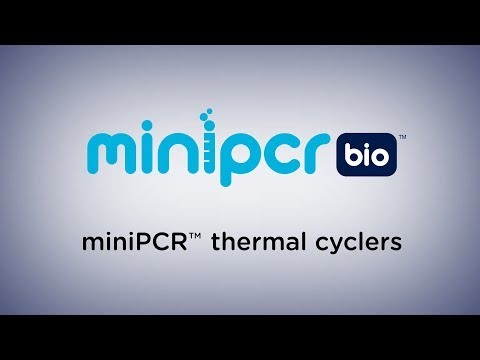

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('ALNZJhUOSMs')

## 3.1.5 The Challenge: Prototyping a Control System for a PCR Thermal Cycler

With two heater/sensor assemblies, the temperature Control Lab provides a platform for developing and testing control strategies for a PCR thermal cycler.

<img width="500"  src="http://apmonitor.com/pdc/uploads/Main/tclab_front.jpg">

There are some differences. PCR thermal cyclers generally include thermoelectric coolers rather than rely solely on convective cooling, and generally have more "control authority" in the form of larger power inputs. So we will be limited in our ability to mimic higher performance devices. But for the purposes of prototyping, the Temperature Contol Lab offers an excellent platform for initial prototype.

## 3.1.6 What will this project entail?

![](figures/B.01-FeedbackControlDiagram.png)

Consider the use of the Temperature Control Lab as a prototyping device for a PCR Thermal Cycling device. Discuss each of the following aspects of the control loop:

1. What are the control variables (CV)?
2. What are the measurement process variables (PV)? Are they different than the CV's?
3. What are the setpoints (SP)?
4. What are the manipulated variables (MV)?
5. What are some examples of disturbance variables (DV)? (There are many possibilities.)
6. What diagnostics would be useful in this application?

In qualitative terms, describe:

1. Why is feedback control important for this application?  
2. Is there a role for feedforward control?
3. How will we deal with the fact the CV's are not the same as the PV's?
4. Describe some possible control algorithms that would allow you to track a setpoint.


<!--NAVIGATION-->
< [3.0 Feedback Control](https://jckantor.github.io/cbe30338-2021/03.00-Feedback-Control.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [3.2 Setpoints](https://jckantor.github.io/cbe30338-2021/03.02-Setpoints.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe30338-2021/blob/master/docs/03.01-Case-Study-Thermal-Cycling-PCR.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe30338-2021/03.01-Case-Study-Thermal-Cycling-PCR.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>